In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Предварительное исследование данных и формулировка, что должно считаться курсом. Загрузим и проанализируем предоставленные данные.

In [3]:
assessments_df = pd.read_csv('assessments.csv')
assessments_df
# code_module — идентификационный код предмета.
# code_presentation — семестр (Идентификационный код).
# id_assessment — тест (Идентификационный номер ассессмента).
# assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).
# date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).
# weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [4]:
# Посмотрим, каким типом теста оканчиваются предметы
assessments_df.groupby('code_module', as_index=False).agg({'assessment_type':'unique'})

,code_module,assessment_type
0,AAA,"[TMA, Exam]"
1,BBB,"[CMA, TMA, Exam]"
2,CCC,"[CMA, TMA, Exam]"
3,DDD,"[CMA, TMA, Exam]"
4,EEE,"[TMA, Exam]"
5,FFF,"[CMA, TMA, Exam]"
6,GGG,"[CMA, TMA, Exam]"


<!-- А теперь попробуем следующее -->

In [5]:
# Уникальные значения предметов
assessments_df.code_module.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [6]:
# Уникальные значения семестров
assessments_df.code_presentation.unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [7]:
# Пропущенные значения
assessments_df.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [8]:
# Теперь взглянем на то, в каких семестрах какие предметы заканчивались именно ЭКЗАМЕНОМ
assessments_df.loc[assessments_df.assessment_type == 'Exam'] \
    .groupby(['code_presentation', 'code_module']) \
    .agg({'id_assessment':'count'})
# Исходя из полученной таблицы, можно понять, что мы имеем дело с четырьмя семестрами с начала 2013го (когда мало экзаменов) по конец 2014го года

id_assessment
code_presentation code_module               
2013B             BBB                      1
                  DDD                      1
                  FFF                      1
2013J             AAA                      1
                  BBB                      1
                  DDD                      1
                  EEE                      1
                  FFF                      1
                  GGG                      1
2014B             BBB                      1
                  CCC                      2
                  DDD                      1
                  EEE                      1
                  FFF                      1
                  GGG                      1
2014J             AAA                      1
                  BBB                      1
                  CCC                      2
                  DDD                      1
                  EEE                      1
                  FFF                      1
                  GGG                      1

##### Загружаем следующие датафреймы

In [9]:
courses_df = pd.read_csv('courses.csv')
courses_df
# code_module — предмет (идентификационный код).
# code_presentation — семестр (идентификационный код).
# module_presentation_length — продолжительность семестра в днях.

# Данная таблица подтверждает наши рассуждения о наличии двух семестров, в которых сдавались различные предметы

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [10]:
stud_assessm_df = pd.read_csv('studentAssessment.csv')
stud_assessm_df
# id_assessment — тест (идентификационный номер).
# id_student — идентификационный номер студента.
# date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.
# is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).
# score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [11]:
stud_reg_df = pd.read_csv('studentRegistration.csv')
stud_reg_df
# code_module — предмет (идентификационный код).
# code_presentation — семестр (идентификационный код)
# id_student — идентификационный номер студента.
# date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).
# date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


#### Таким образом, КУРСОМ должен считаться определенные предмет (code_module)  в определенном семестре (code_presentation), то есть, например, [BBB в 2013B]

### ЗАДАНИЕ 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

###### Мы объединим два датафрейма в один, чтобы были видны курсы и соответствующий id студента. Далее отфильтруем данные так, чтобы оставить только успешно сданные экзамены. Наконец, по id студентов посчитаем, сколько из них сдало только один курс, а сколько больше.

In [12]:
# Мерджим два датафрейма
ass_and_studass_merged = assessments_df.merge(stud_assessm_df, on = 'id_assessment')
ass_and_studass_merged

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0


In [13]:
# Экзамены (Exam) студенты сдавали только по двум курсам
ass_and_studass_merged \
    .query("assessment_type == 'Exam'") \
    .groupby(['code_module', 'code_presentation'], as_index=False) \
    .agg(count = ('id_assessment', 'count'))

,code_module,code_presentation,count
0,CCC,2014B,747
1,CCC,2014J,1168
2,DDD,2013B,602
3,DDD,2013J,968
4,DDD,2014B,524
5,DDD,2014J,950


In [14]:
# Смотрим пропущенные значения, нас они не волнуют
ass_and_studass_merged.isna().sum()

code_module             0
code_presentation       0
id_assessment           0
assessment_type         0
date                 2865
weight                  0
id_student              0
date_submitted          0
is_banked               0
score                 173
dtype: int64

In [15]:
# Создадим датафрейм только с успешно сданными ЭКЗАМЕНАМИ
stud_passed_exam = ass_and_studass_merged.loc[(ass_and_studass_merged.assessment_type == 'Exam') & (ass_and_studass_merged.score >= 40)]
stud_passed_exam

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
52928,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0
...,...,...,...,...,...,...,...,...,...,...
95978,DDD,2014J,25368,Exam,NaN,100.0,652617,243,0,56.0
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0


In [16]:
# По каждому студенту узнаем его количество сданных курсов
stud_exams_passed = stud_passed_exam.groupby('id_student', as_index=False).agg(exams_count = ('id_assessment', 'count'))
stud_exams_passed

,id_student,exams_count
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


In [17]:
# Наконец, узнаем, сколько из них успешно сдали только один курс
stud_exams_passed.exams_count.value_counts().to_frame()

,exams_count
1,3802
2,295


##### Итак, успешно сдали только один курс 3802 студента

###  ЗАДАНИЕ 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (10 баллов)

##### У нас уже есть датафрейм с успешно сданными экзаменами, в нем посчитаем количество сдавших экзамен студентов по каждому предмету (экзамену). Затем посчитаем количество всех студентов, которые сдавали экзамены по предметам (успешно и неуспешно). Объединим эти таблицы и создадим колонку "Завершаемость курсов"

In [18]:
# Проверяем, есть ли перезачеты
stud_passed_exam.is_banked.value_counts()

0    4392
Name: is_banked, dtype: int64

In [19]:
stud_passed_exam

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
52928,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0
...,...,...,...,...,...,...,...,...,...,...
95978,DDD,2014J,25368,Exam,NaN,100.0,652617,243,0,56.0
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0


In [20]:
stud_passed = stud_passed_exam.groupby('id_assessment', as_index=False).agg({'id_student':'count'})
stud_passed

,id_assessment,id_student
0,24290,664
1,24299,1019
2,25340,504
3,25354,878
4,25361,485
5,25368,842


In [21]:
exams_only = ass_and_studass_merged[ass_and_studass_merged.assessment_type == 'Exam']
exams_only

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
95983,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


In [22]:
# Проверяем, есть ли перезачеты
exams_only.is_banked.value_counts()

0    4959
Name: is_banked, dtype: int64

In [23]:
stud_total = exams_only.groupby('id_assessment', as_index=False).agg({'id_student':'count'})
stud_total

,id_assessment,id_student
0,24290,747
1,24299,1168
2,25340,602
3,25354,968
4,25361,524
5,25368,950


In [24]:
# Мерджим датафреймы
cources_completion = stud_passed.merge(stud_total, on = 'id_assessment').rename(columns={'id_student_x':'stud_passed', 'id_student_y':'stud_total'})
cources_completion

,id_assessment,stud_passed,stud_total
0,24290,664,747
1,24299,1019,1168
2,25340,504,602
3,25354,878,968
4,25361,485,524
5,25368,842,950


In [25]:
# Считаем "Завершаемость курсов"
cources_completion['completion'] = (cources_completion.stud_passed / cources_completion.stud_total).mul(100).round(2)
cources_completion.sort_values(by = 'completion', ascending = False)

,id_assessment,stud_passed,stud_total,completion
4,25361,485,524,92.56
3,25354,878,968,90.70
0,24290,664,747,88.89
5,25368,842,950,88.63
1,24299,1019,1168,87.24
2,25340,504,602,83.72


In [26]:
# Смотрим, в каких семестрах сдавались экзамены
exams_only.groupby(['code_module', 'code_presentation', 'id_assessment'], as_index=False).agg({'id_student':'count'})

,code_module,code_presentation,id_assessment,id_student
0,CCC,2014B,24290,747
1,CCC,2014J,24299,1168
2,DDD,2013B,25340,602
3,DDD,2013J,25354,968
4,DDD,2014B,25361,524
5,DDD,2014J,25368,950


##### Таким, образом, самый легкий экзамен - 25361 (в рамках курса предмета DDD в семестре 2014B), его завершаемость равна 92.56%. Самый сложный экзамен - 25340 (в рамках курса предмета DDD в семестре 2013B), его завершаемость равна 83.72%.

### 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (7 баллов) 

##### Отберем снова только успешно сданные экзамены и посчитаем среднюю дату сдачи теста студентом, измеряемую как количество дней с начала семестра (это и есть средний срок сдачи экзаменов)

In [27]:
# Как мы помним, экзамены сдавались только по двум предметам
ass_and_studass_merged.groupby('code_module', as_index=False).agg({'assessment_type':'unique'})

,code_module,assessment_type
0,AAA,[TMA]
1,BBB,"[CMA, TMA]"
2,CCC,"[CMA, TMA, Exam]"
3,DDD,"[CMA, TMA, Exam]"
4,EEE,[TMA]
5,FFF,"[CMA, TMA]"
6,GGG,"[CMA, TMA]"


In [28]:
# У нас уже есть датафрейм только с успешно сданными экзаменами
stud_passed_exam

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
52928,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0
...,...,...,...,...,...,...,...,...,...,...
95978,DDD,2014J,25368,Exam,NaN,100.0,652617,243,0,56.0
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0


In [29]:
# Проверяем, есть ли пересдачи
stud_passed_exam.is_banked.value_counts()

0    4392
Name: is_banked, dtype: int64

In [30]:
# Посчитаем среднее время сдачи экзаменова студентами
mean_exam_time = stud_passed_exam.groupby('code_module',as_index=False) \
    .agg(mean_time = ('date_submitted', 'mean')) \
    .round(2)
mean_exam_time

,code_module,mean_time
0,CCC,239.35
1,DDD,237.98


#####  Итак, средний срок сдачи экзамена CCC - 239 дней, экзамена DDD - 238 дней (округляя до целого числа). Результат практически равный.

### 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)

##### Вначале считываем нужный датафрейм. Считаем количество регистраций и отписок с предметов, строим барплоты и сравниваем ТОПы

In [31]:
stud_reg_df

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [32]:
# Проверяем пропущенные значения. Агрегатная функция pandas count все равно будет игнорировать их
stud_reg_df.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [33]:
# Считаем количество регистраций на предметы
registration_count = stud_reg_df.groupby('code_module',as_index=False) \
    .agg(registration_count = ('date_registration','count')) \
    .sort_values(by = 'registration_count', ascending=False)
registration_count

,code_module,registration_count
1,BBB,7900
5,FFF,7751
3,DDD,6257
2,CCC,4426
4,EEE,2932
6,GGG,2534
0,AAA,748


Text(0, 0.5, 'Количество регистраций на предмет\n')

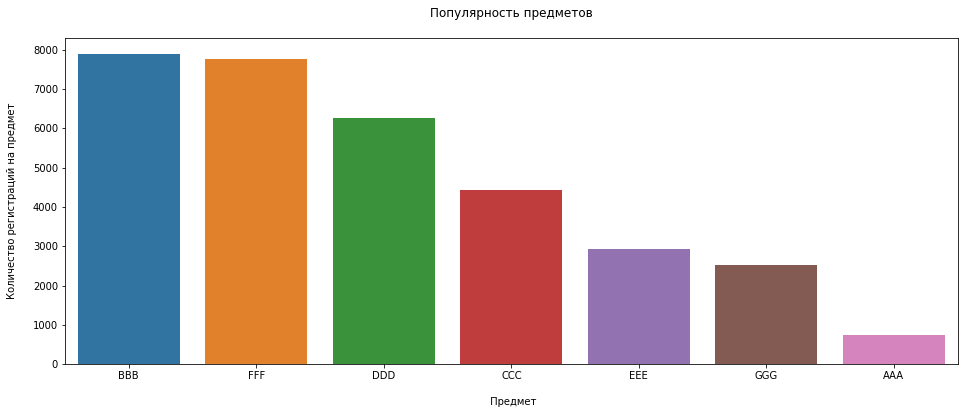

In [34]:
# Таким образом, ТОП-3 курсов по популярности составляют: BBB, FFF, DDD
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=registration_count, x='code_module', y='registration_count')
ax.set_title('Популярность предметов\n')
ax.set_xlabel('\n Предмет')
ax.set_ylabel('Количество регистраций на предмет\n')

In [35]:
# Теперь взглянем на отток с предметов
unregistration_count = stud_reg_df \
    .groupby('code_module', as_index=False) \
    .agg(unregistration_count = ('date_unregistration', 'count')) \
    .sort_values('unregistration_count', ascending=False)
unregistration_count

,code_module,unregistration_count
5,FFF,2380
1,BBB,2377
3,DDD,2235
2,CCC,1947
4,EEE,718
6,GGG,289
0,AAA,126


Text(0, 0.5, 'Количество отмен регистраций с предмета\n')

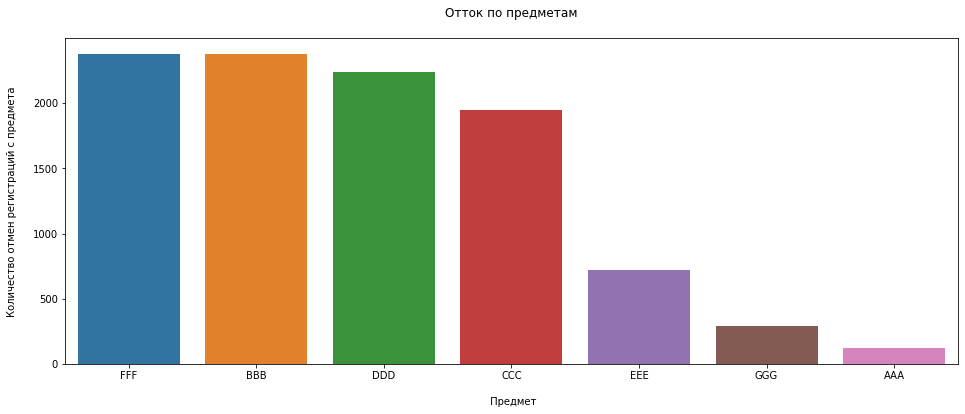

In [36]:
# ТОП-3 курсов по оттоку составляют: FFF, BBB, DDD.
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=unregistration_count, x='code_module', y='unregistration_count')
ax.set_title('Отток по предметам\n')
ax.set_xlabel('\n Предмет')
ax.set_ylabel('Количество отмен регистраций с предмета\n')

##### Таким образом, ТОП-3 курсов по популярности составляют: BBB, FFF, DDD. В свою очередь, ТОП-3 курсов по оттоку: FFF, BBB, DDD.  По сравнению с предыдущим топом поменялись первое и второе место. Однако топ составляют те же курсы, поскольку именно они были лидерами по количеству регистраций. По всей видимости, курс FFF вызывает у студентов большее желание покинуть его   

### 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. (15 баллов)

##### Сначала выберем только успешно сданные тесты, потом все тесты. Объединим таблицы и посчитаем среднюю завершаемоть курсов по семестрам. Далее из датафрейма о результатах тестов студентов посчитаем средние сроки сдачи курсов по семестрам.

In [37]:
# Выбираем успешно сданные курсы
successful_count = ass_and_studass_merged \
    .loc[ass_and_studass_merged.score >= 40] \
    .groupby(['code_module','code_presentation'], as_index=False) \
    .agg({'id_student':'count'})
successful_count

,code_module,code_presentation,id_student
0,AAA,2013J,1591
1,AAA,2014J,1465
2,BBB,2013B,11015
3,BBB,2013J,14180
4,BBB,2014B,9815
5,BBB,2014J,6548
6,CCC,2014B,6673
7,CCC,2014J,10496
8,DDD,2013B,9334
9,DDD,2013J,7187


In [38]:
# Выбираем все сданные курсы
total_count = ass_and_studass_merged \
    .groupby(['code_module','code_presentation'], as_index=False) \
    .agg({'id_student':'count'})
total_count.head()

,code_module,code_presentation,id_student
0,AAA,2013J,1633
1,AAA,2014J,1516
2,BBB,2013B,11256
3,BBB,2013J,14375
4,BBB,2014B,9993


In [39]:
# Мерджим датафреймы
completion_df = successful_count.merge(total_count, on = ['code_module', 'code_presentation']) \
    .rename(columns={'id_student_x':'stud_passed', 'id_student_y':'stud_total'})
completion_df

,code_module,code_presentation,stud_passed,stud_total
0,AAA,2013J,1591,1633
1,AAA,2014J,1465,1516
2,BBB,2013B,11015,11256
3,BBB,2013J,14180,14375
4,BBB,2014B,9815,9993
5,BBB,2014J,6548,7408
6,CCC,2014B,6673,7489
7,CCC,2014J,10496,11451
8,DDD,2013B,9334,10373
9,DDD,2013J,7187,7936


In [40]:
# Заводим новую колонку с "Завершаемостью курсов"
completion_df['completion'] = completion_df['completion'] = (completion_df.stud_passed / completion_df.stud_total).mul(100).round(2)
completion_df.sort_values(by = 'completion', ascending = False)

,code_module,code_presentation,stud_passed,stud_total,completion
3,BBB,2013J,14180,14375,98.64
14,EEE,2014J,3181,3229,98.51
18,FFF,2014J,15903,16184,98.26
19,GGG,2013J,5846,5950,98.25
4,BBB,2014B,9815,9993,98.22
12,EEE,2013J,2831,2884,98.16
15,FFF,2013B,11957,12195,98.05
20,GGG,2014B,4797,4896,97.98
17,FFF,2014B,9982,10196,97.90
2,BBB,2013B,11015,11256,97.86


In [41]:
# Определяем завершаемость по семестрам
completion_df.groupby('code_presentation', as_index=False).agg({'completion':'mean'}).sort_values(by='completion')
# Итак, семестр с самой низкой завершаемостью курсов (94.86 %) - 2014J.

,code_presentation,completion
3,2014J,94.864286
2,2014B,95.026667
0,2013B,95.296667
1,2013J,96.768333


In [42]:
# Посчитаем теперь срок сдачи с помощью прекрасного датафрейма, содержащего только успешно сданные ЭКЗАМЕНЫ
stud_passed_exam

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
52928,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0
...,...,...,...,...,...,...,...,...,...,...
95978,DDD,2014J,25368,Exam,NaN,100.0,652617,243,0,56.0
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0


In [43]:
stud_passed_exam \
    .groupby('code_presentation', as_index=False) \
    .agg({'date_submitted':'mean'}) \
    .sort_values(by = 'date_submitted', ascending = False)
# Таким образом, семестр 2014J оказался еще и с самыми долгими сдачами курсов (~ 244 дня)

,code_presentation,date_submitted
3,2014J,243.680279
1,2013J,239.509112
2,2014B,232.997389
0,2013B,230.164683


##### Таким образом, семестр 2014J обладает самой низкой завершаемостью курсов и самыми долгими сроками сдачи курсов.

### 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Описание подхода можно найти тут. (23 балла)

In [44]:
# Рассмотрим датафрейм по сдачам ЭКЗАМЕНОВ студентами (так как RFM-метрика подразумевает именно экзамены)
exams_only

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
95983,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


In [45]:
# Для будущего параметра F нам необходимо для каждого студента рассчитать завершаемость курсов
# Для начала посчитаем для каждого студента число успешных попыток сдать экзамены
succ_stud = exams_only[exams_only.score >= 40] \
                    .groupby('id_student', as_index=False) \
                    .agg(successful_attempts = ('id_assessment', 'count'))
succ_stud

,id_student,successful_attempts
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


In [46]:
# Теперь узнаем для каждого студента число всех попыток сдать экзамены
total_stud = exams_only.groupby('id_student', as_index=False) \
                        .agg(total_attempts = ('id_assessment','count'))
total_stud

,id_student,total_attempts
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4628,2694886,1
4629,2694933,1
4630,2695608,1
4631,2697181,1


In [47]:
# Мерджим таблицы. Считаем новую колонку "Завершаемость" по каждому студенту, пропуски заполняем нулями
stud_exams_completion = total_stud.merge(succ_stud, on='id_student', how='left')
stud_exams_completion['completion'] = stud_exams_completion.successful_attempts / stud_exams_completion.total_attempts 
stud_exams_completion = stud_exams_completion.fillna(0)
stud_exams_completion.sort_values('completion', ascending=False)

,id_student,total_attempts,successful_attempts,completion
0,23698,1,1.0,1.0
3020,624927,2,2.0,1.0
3026,625077,1,1.0,1.0
3025,625067,1,1.0,1.0
3024,625035,1,1.0,1.0
...,...,...,...,...
955,470921,1,0.0,0.0
3596,652619,1,0.0,0.0
2607,602365,1,0.0,0.0
3591,652267,1,0.0,0.0


In [48]:
# Рассчитываем показатели R и M (средняя сдача экзамена и средний балл за экзамен)
stud_rm = exams_only.groupby('id_student', as_index=False) \
                                        .agg({'date_submitted':'mean', 'score':'mean'}) \
                                        .rename(columns={'date_submitted':'mean_R','score':'mean_M'})
stud_rm

,id_student,mean_R,mean_M
0,23698,243.0,80.0
1,24213,236.0,58.0
2,27116,243.0,96.0
3,28046,237.0,40.0
4,28787,243.0,44.0
...,...,...,...
4628,2694886,236.0,69.0
4629,2694933,230.0,73.0
4630,2695608,237.0,73.0
4631,2697181,230.0,80.0


In [49]:
# Финальный датафрейм с показателями RFM для каждого студента
stud_rfm = stud_rm.merge(stud_exams_completion, on='id_student') \
    .rename(columns={'completion':'F_score'})
stud_rfm = stud_rfm[['id_student','mean_R', 'F_score', 'mean_M']]
stud_rfm

,id_student,mean_R,F_score,mean_M
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0
...,...,...,...,...
4628,2694886,236.0,1.0,69.0
4629,2694933,230.0,1.0,73.0
4630,2695608,237.0,1.0,73.0
4631,2697181,230.0,1.0,80.0


In [50]:
# Разбиваем каждый параметр RFM на группы по квантилям.
quantiles = stud_rfm[['mean_R', 'F_score', 'mean_M']].quantile([.2, .4, .6, .8]).to_dict()
quantiles

{'mean_R': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'F_score': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'mean_M': {0.2: 46.200000000000045, 0.4: 60.0, 0.6: 72.0, 0.8: 84.0}}

In [51]:
stud_rfm.describe()
# Исходя из данных, большинство студентов по показателю R попадает в интервал [234;243]

,id_student,mean_R,F_score,mean_M
count,4.633000e+03,4633.000000,4633.000000,4633.000000
mean,7.256904e+05,238.462227,0.881286,65.117958
std,5.753498e+05,5.653378,0.321142,20.470561
min,2.369800e+04,229.000000,0.000000,0.000000
25%,5.011580e+05,234.000000,1.000000,50.000000
50%,5.884820e+05,241.000000,1.000000,66.000000
75%,6.463510e+05,243.000000,1.000000,82.000000
max,2.698251e+06,285.000000,1.000000,100.000000


In [52]:
# Показатели F приобретают всего три значения
stud_rfm.F_score.unique()

array([1. , 0. , 0.5])

Теперь необходимо присвоить ранги каждому параметру RFM.
#### Среднее время сдачи экзамена (R)     - чем меньше, тем лучше
#### Завершаемость курсов (F)             - чем больше значение, тем лучше
#### Среднее количество баллов за экзамен (M) - чем больше, тем лучше

In [53]:
# Определим функцию для параметра R
def r_score (x):
    if x <= 234:
        return 3
    elif x <= 243:
        return 2
    else:
        return 1

In [54]:
# Определим функцию для параметра F
def f_score (x, c):
    if x < 0.5:
        return 1
    elif x < 1:
        return 2
    else:
        return 3

In [55]:
# Определим функцию для параметра M (несдача экзамена < 40 баллов), отличная сдача экзамена > 75 баллов)
def m_score (x, c):
    if x < 40:
        return 1
    elif x <= 60:
        return 2
    elif x <= 75:
        return 3
    else:
        return 4

In [56]:
stud_rfm['R'] = stud_rfm['mean_R'].apply(lambda x: r_score(x))
stud_rfm['F'] = stud_rfm['F_score'].apply(lambda x: f_score(x, 'F_score'))
stud_rfm['M'] = stud_rfm['mean_M'].apply(lambda x: m_score(x, 'mean_M'))

In [57]:
# Объединим  все три параметра R F M в одно строковое значение, используя функцию "map"
stud_rfm['RFM'] = stud_rfm['R'].map(str) + stud_rfm['F'].map(str) + stud_rfm['M'].map(str)
stud_rfm = stud_rfm[['id_student','mean_R', 'F_score', 'mean_M', 'R', 'F', 'M', 'RFM']]
stud_rfm

,id_student,mean_R,F_score,mean_M,R,F,M,RFM
0,23698,243.0,1.0,80.0,2,3,4,234
1,24213,236.0,1.0,58.0,2,3,2,232
2,27116,243.0,1.0,96.0,2,3,4,234
3,28046,237.0,1.0,40.0,2,3,2,232
4,28787,243.0,1.0,44.0,2,3,2,232
...,...,...,...,...,...,...,...,...
4628,2694886,236.0,1.0,69.0,2,3,3,233
4629,2694933,230.0,1.0,73.0,3,3,3,333
4630,2695608,237.0,1.0,73.0,2,3,3,233
4631,2697181,230.0,1.0,80.0,3,3,4,334


In [58]:
# Посмотрим на получившееся количество уникальных комбинаций RFM
stud_rfm.RFM.nunique()

17

In [59]:
# Выделим сегменты на основе RFM-оценки. Будем рассматривать оценки R и F, так как F (завершаемость) частично включает 
# в себя М (если < 40, то завершаемости нет)

segt_map = {
    r'11': 'двоечники',
    r'22': 'середняки',
    r'33': 'супер отличники',
    r'12': 'долго сдающие, но не смогли дожать',
    r'13': 'долго сдающие, но доводят до конца',
    r'21': 'середняки-двоечники',
    r'23': 'середняки-отличники',
    r'31': 'легко усваивающие, но сдались',
    r'32': 'легко усваивающие, но не смогли дожать'
}

stud_rfm['Segment'] = stud_rfm['R'].map(str) + stud_rfm['F'].map(str)
stud_rfm['Segment'] = stud_rfm['Segment'].replace(segt_map, regex=True)
stud_rfm 

,id_student,mean_R,F_score,mean_M,R,F,M,RFM,Segment
0,23698,243.0,1.0,80.0,2,3,4,234,середняки-отличники
1,24213,236.0,1.0,58.0,2,3,2,232,середняки-отличники
2,27116,243.0,1.0,96.0,2,3,4,234,середняки-отличники
3,28046,237.0,1.0,40.0,2,3,2,232,середняки-отличники
4,28787,243.0,1.0,44.0,2,3,2,232,середняки-отличники
...,...,...,...,...,...,...,...,...,...
4628,2694886,236.0,1.0,69.0,2,3,3,233,середняки-отличники
4629,2694933,230.0,1.0,73.0,3,3,3,333,супер отличники
4630,2695608,237.0,1.0,73.0,2,3,3,233,середняки-отличники
4631,2697181,230.0,1.0,80.0,3,3,4,334,супер отличники


In [60]:
stud_rfm.Segment.unique()

array(['середняки-отличники', 'долго сдающие, но доводят до конца',
       'супер отличники', 'середняки-двоечники',
       'легко усваивающие, но сдались', 'двоечники', 'середняки',
       'легко усваивающие, но не смогли дожать',
       'долго сдающие, но не смогли дожать'], dtype=object)

In [61]:
# Построим границы метрик RFM для каждого сегмента
stud_rfm_max = stud_rfm.groupby('Segment', as_index=False)\
                            .agg({'mean_R':'max'\
                                  ,'F_score':'max'\
                                  ,'mean_M':'max'}) \
                            .rename(columns={'mean_R':'R_max'\
                                            ,'F_score':'F_max'\
                                            ,'mean_M':'M_max'})

stud_rfm_min = stud_rfm.groupby('Segment', as_index=False)\
                            .agg({'mean_R':'min'\
                                  ,'F_score':'min'\
                                  ,'mean_M':'min'}) \
                            .rename(columns={'mean_R':'R_min'\
                                            ,'F_score':'F_min'\
                                            ,'mean_M':'M_min'})

In [62]:
# Объединим в одну таблицу
stud_rfm_metrics = stud_rfm_max.merge(stud_rfm_min, on='Segment')
stud_rfm_metrics[['Segment','R_max','R_min','F_max','F_min','M_max','M_min']]

,Segment,R_max,R_min,F_max,F_min,M_max,M_min
0,двоечники,256.0,244.0,0.0,0.0,38.0,0.0
1,"долго сдающие, но доводят до конца",285.0,243.5,1.0,1.0,100.0,40.0
2,"долго сдающие, но не смогли дожать",243.5,243.5,0.5,0.5,33.5,33.5
3,"легко усваивающие, но не смогли дожать",233.5,229.5,0.5,0.5,58.0,38.0
4,"легко усваивающие, но сдались",234.0,229.0,0.0,0.0,38.0,8.0
5,середняки,243.0,235.5,0.5,0.5,56.0,32.0
6,середняки-двоечники,243.0,235.0,0.0,0.0,38.0,0.0
7,середняки-отличники,243.0,235.5,1.0,1.0,100.0,40.0
8,супер отличники,234.0,229.0,1.0,1.0,100.0,40.0


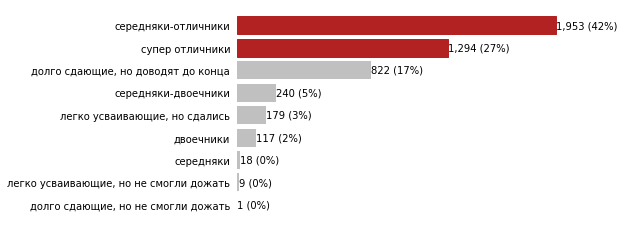

In [63]:
# Построим гистограмму количества студентов в каждой группе
segments_counts = stud_rfm['Segment'].value_counts().sort_values()

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['супер отличники', 'середняки-отличники']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()